## <a name="abstract">Titanic Machine Learning From Disaster</a>

Abstract The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.
One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.
In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

In [2]:
using DataFrames
using DecisionTree
using Gadfly

## Load Data

In [27]:
train = readtable("data/train.csv")
test = readtable("data/test.csv");

### Handle Missing Data

In [28]:
showcols(train)
showcols(test)

891x12 DataFrames.DataFrame
| Col # | Name        | Eltype     | Missing |
|-------|-------------|------------|---------|
| 1     | PassengerId | Int64      | 0       |
| 2     | Survived    | Int64      | 0       |
| 3     | Pclass      | Int64      | 0       |
| 4     | Name        | UTF8String | 0       |
| 5     | Sex         | UTF8String | 0       |
| 6     | Age         | Float64    | 177     |
| 7     | SibSp       | Int64      | 0       |
| 8     | Parch       | Int64      | 0       |
| 9     | Ticket      | UTF8String | 0       |
| 10    | Fare        | Float64    | 0       |
| 11    | Cabin       | UTF8String | 687     |
| 12    | Embarked    | UTF8String | 2       |418x11 DataFrames.DataFrame
| Col # | Name        | Eltype     | Missing |
|-------|-------------|------------|---------|
| 1     | PassengerId | Int64      | 0       |
| 2     | Pclass      | Int64      | 0       |
| 3     | Name        | UTF8String | 0       |
| 4     | Sex         | UTF8String | 0       |
| 5  

In [29]:
most_frequenty_embarked_class = "S"
average_age = mean(train[!isna(train[:Age]), :Age])
average_fare = mean(train[!isna(train[:Fare]), :Fare]);

In [31]:
train[isna(train[:Embarked]), :Embarked] = most_frequenty_embarked_class
train[isna(train[:Age]), :Age] = average_age
test[isna(test[:Embarked]), :Embarked] = most_frequenty_embarked_class
test[isna(test[:Age]), :Age] = average_age
test[isna(test[:Fare]), :Fare] = average_fare;

### Prepare Training/Validation Set

In [32]:
features_names = [:Pclass, :Sex, :Age, :SibSp, :Parch, :Fare, :Embarked]
training_features = array(train[:, features_names])
training_labels = array(train[:, :Survived])
test_features = array(test[:, features_names]);

### Training & Evaluation


Fold 1

2x2 Array{Int64,2}:
 108  0
  70  0

2x2 Array{Int64,2}:
 110  0
  68  0


Classes:  Any[0,1]
Matrix:   
Accuracy: 0.6067415730337079
Kappa:    0.0

Fold 2
Classes:  Any[0,1]
Matrix:   
Accuracy: 0.6179775280898876
Kappa:    0.0

Fold 3

2x2 Array{Int64,2}:
 109  0
  69  0

2x2 Array{Int64,2}:
 107  0
  71  0


Classes:  Any[0,1]
Matrix:   
Accuracy: 0.6123595505617978
Kappa:    0.0

Fold 4
Classes:  Any[0,1]
Matrix:   
Accuracy: 0.601123595505618
Kappa:    0.0

Fold 5

2x2 Array{Int64,2}:
 114  0
  64  0


Classes:  Any[0,1]
Matrix:   
Accuracy: 0.6404494382022472
Kappa:    0.0

Mean Accuracy: 0.6157303370786517

Fold 1

2x2 Array{Int64,2}:
 106  0
  72  0


Classes:  Any[0,1]
Matrix:   
Accuracy: 0.5955056179775281
Kappa:    0.0

Fold 2

2x2 Array{Int64,2}:
 108  0
  70  0

2x2 Array{Int64,2}:
 110  0
  68  0


Classes:  Any[0,1]
Matrix:   
Accuracy: 0.6067415730337079
Kappa:    0.0

Fold 3
Classes:  Any[0,1]
Matrix:   
Accuracy: 0.6179775280898876
Kappa:    0.0

Fold 4

2x2 Array{Int64,2}:
 112  0
  66  0

2x2 Array{Int64,2}:
 112  0
  66  0


Classes:  Any[0,1]
Matrix:   
Accuracy: 0.6292134831460674
Kappa:    0.0

Fold 5
Classes:  Any[0,1]
Matrix:   
Accuracy: 0.6292134831460674
Kappa:    0.0

Mean Accuracy: 0.6157303370786517

Fold 1

2x2 Array{Int64,2}:
 95  22
 17  44

2x2 Array{Int64,2}:
 91  16
 16  55


Classes:  Any[0,1]
Matrix:   
Accuracy: 0.7808988764044944
Kappa:    0.5230177270853374

Fold 2
Classes:  Any[0,1]
Matrix:   
Accuracy: 0.8202247191011236
Kappa:    0.6251151770435699

Fold 3

2x2 Array{Int64,2}:
 92  20
 16  50


Classes:  Any[0,1]
Matrix:   
Accuracy: 0.797752808988764
Kappa:    0.5718866916087653

Fold 4

2x2 Array{Int64,2}:
 78  22
 15  63

2x2 Array{Int64,2}:
 97  16
 21  44


Classes:  Any[0,1]
Matrix:   
Accuracy: 0.7921348314606742
Kappa:    0.5819474419195126

Fold 5
Classes:  Any[0,1]
Matrix:   
Accuracy: 0.7921348314606742
Kappa:    0.5442214532871974

Mean Accuracy: 0.7966292134831461

Fold 1

2x2 Array{Int64,2}:
 87  18
 15  58

2x2 Array{Int64,2}:
 92  24
 14  48


Classes:  Any[0,1]
Matrix:   
Accuracy: 0.8146067415730337
Kappa:    0.6192143134966939

Fold 2
Classes:  Any[0,1]
Matrix:   
Accuracy: 0.7865168539325843
Kappa:    0.5467703028678639

Fold 3

2x2 Array{Int64,2}:
 79  26
 18  55

2x2 Array{Int64,2}:
 93  15
 21  49


Classes:  Any[0,1]
Matrix:   
Accuracy: 0.7528089887640449
Kappa:    0.4974977543949697

Fold 4
Classes:  Any[0,1]
Matrix:   
Accuracy: 0.797752808988764
Kappa:    0.5697018533440773

Fold 5

2x2 Array{Int64,2}:
 101  13
  22  42

2x2 Array{Int64,2}:
 94  28
 15  41


Classes:  Any[0,1]
Matrix:   
Accuracy: 0.8033707865168539
Kappa:    0.5594682506010464

Mean Accuracy: 0.7910112359550562

Fold 1
Classes:  Any[0,1]
Matrix:   
Accuracy: 0.7584269662921348
Kappa:    0.4729376118991873

Fold 2

2x2 Array{Int64,2}:
 96  23
 12  47

2x2 Array{Int64,2}:
 88  13
 24  53


Classes:  Any[0,1]
Matrix:   
Accuracy: 0.8033707865168539
Kappa:    0.5762481295061895

Fold 3
Classes:  Any[0,1]
Matrix:   
Accuracy: 0.7921348314606742
Kappa:    0.5692609548724658

Fold 4

2x2 Array{Int64,2}:
 88  20
 23  47

2x2 Array{Int64,2}:
 76  22
 26  54

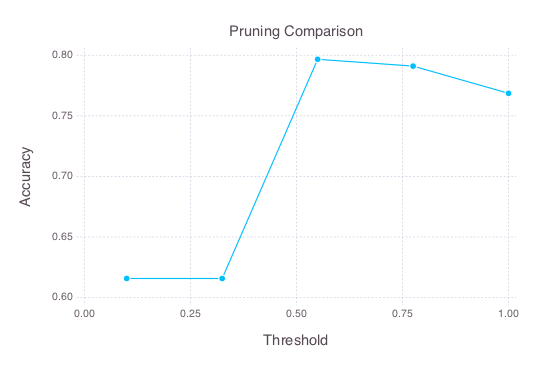


Classes:  Any[0,1]
Matrix:   
Accuracy: 0.7584269662921348
Kappa:    0.4899373583899772

Fold 5
Classes:  Any[0,1]
Matrix:   
Accuracy: 0.7303370786516854
Kappa:    0.4525884161968222

Mean Accuracy: 0.7685393258426967


In [34]:
purities = linspace(0.1, 1.0, 5)
accuracies = map(i -> mean(nfoldCV_tree(training_labels, training_features, purities[i], 5)), vcat(1:length(purities)))
plot(x=purities, y=accuracies, Geom.point, Geom.line, Guide.xlabel("Threshold"), Guide.ylabel("Accuracy"), Guide.title("Pruning Comparison"))

### Use Best Evaluated Model to Predict

In [36]:
model = build_tree(training_labels, training_features)
model = prune_tree(model, 0.7)
predicted_values = apply_tree(model, test_features);

### Save Best Model

In [37]:
prediction_dataframe = DataFrame(PassengerId=test[:PassengerId], Survived=predicted_values)
writetable("./data/prediction_v5_pruned_.7_random_forest_cv5.csv", prediction_dataframe);

### Results on Kaggle

<div style="background-color:#c1f5ba; color:#30b171; padding:5px;
            font-family:'Lucida Sans Unicode', 'Lucida Grande', sans-serif">
    Results from this submission on Kaggle: **0.77033**
</div>